# Вычисление количества объектов на изображении

Импорт необходимых библиотек

In [333]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

logs-1

посмотрим на изображение в RGB и greyscale

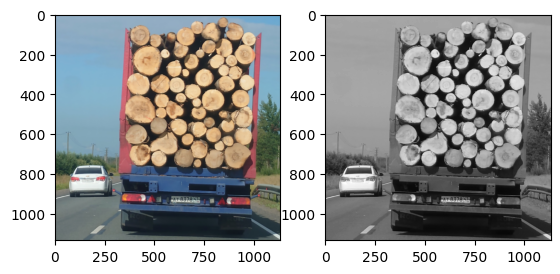

In [334]:
src = cv.imread(r'task2/logs-1.jpg')
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
src = cv.bilateralFilter(src, 9, 75, 75)
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(src)
ax2.imshow(gray, 'grey')

Просто так детектировать не получится, слишком много посторонних предметов на картинке, применим hsv кодировку изображения, чтобы выделить только бревна.

Text(0.5, 1.0, 'Value')

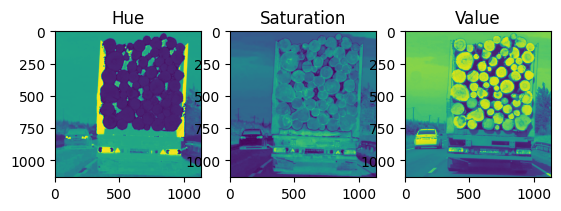

In [335]:
src_hsv = cv.cvtColor(src, cv.COLOR_RGB2HSV)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(src_hsv[:,:,0])
ax1.set_title("Hue")
ax2.imshow(src_hsv[:,:,1])
ax2.set_title("Saturation")
ax3.imshow(src_hsv[:,:,2])
ax3.set_title("Value")

Text(0.5, 1.0, 'HUE')

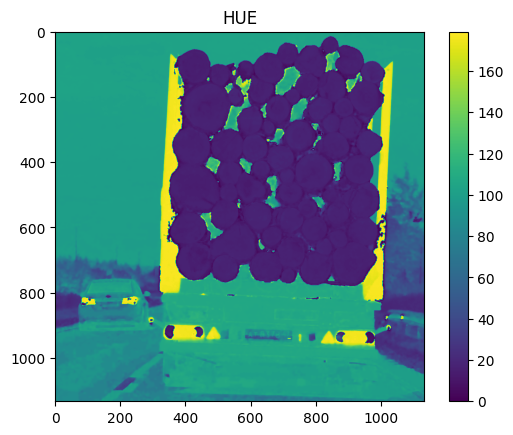

In [336]:
plt.imshow(src_hsv[:,:,0])
plt.colorbar()
plt.title('HUE')

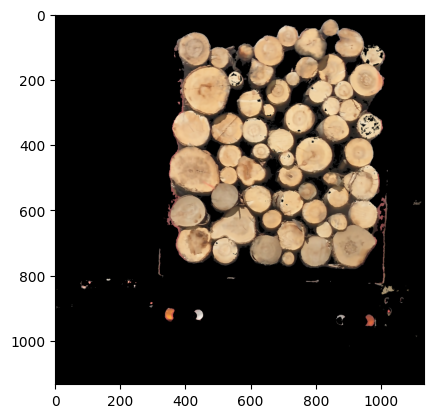

In [337]:
wellplate = np.copy(src)
mask = np.zeros(shape=wellplate.shape[0:2], dtype="bool")
x = np.where(((src_hsv[:,:,0] < 20)))
mask[x] = 1

masked_img = wellplate[:]
masked_img[np.logical_not(mask)] = 0
plt.imshow(masked_img)

In [338]:
gray = cv.cvtColor(masked_img, cv.COLOR_RGB2GRAY)

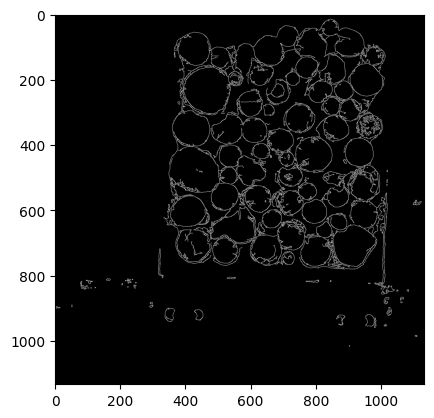

In [339]:
edges = cv.Canny(gray, 20, 400, apertureSize = 3)
plt.imshow(edges, 'gray')

In [340]:
detected_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   1,
                   50,
                   param1 = 400,
                   param2 = 20,
                   minRadius = 15, maxRadius = 80)

Total logs:  60


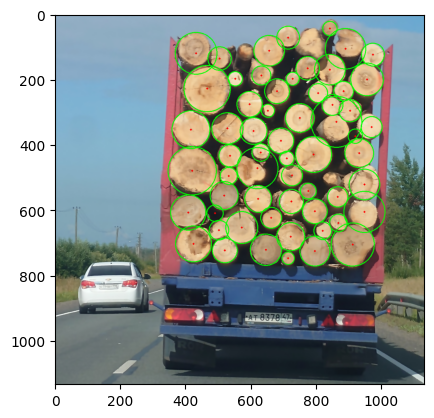

In [341]:
image = src.copy()
pipes_count = 0
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))

    for points in detected_circles[0, :]:
        a, b, r = points[0], points[1], points[2]

        cv.circle(image, (a, b), r, (0, 255, 0), 2)
        cv.circle(image, (a, b), 1, (255, 0, 0), 3)

        pipes_count += 1

print("Total logs: ", pipes_count)
plt.imshow(image)


Все бревна не задетектировались, но большая часть распознана.

logs-2

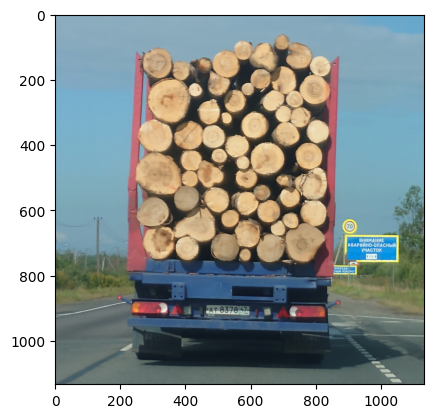

In [342]:
src = cv.imread(r'task2/logs-2.jpg')
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
src = cv.bilateralFilter(src, 9, 75, 75)
plt.imshow(src)

Text(0.5, 1.0, 'Value')

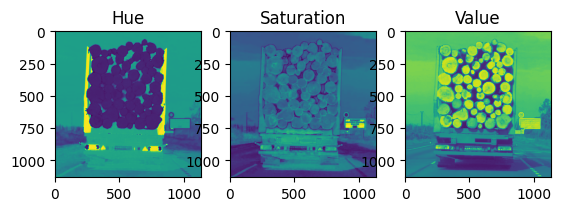

In [343]:
src_hsv = cv.cvtColor(src, cv.COLOR_RGB2HSV)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(src_hsv[:,:,0])
ax1.set_title("Hue")
ax2.imshow(src_hsv[:,:,1])
ax2.set_title("Saturation")
ax3.imshow(src_hsv[:,:,2])
ax3.set_title("Value")

Text(0.5, 1.0, 'HUE')

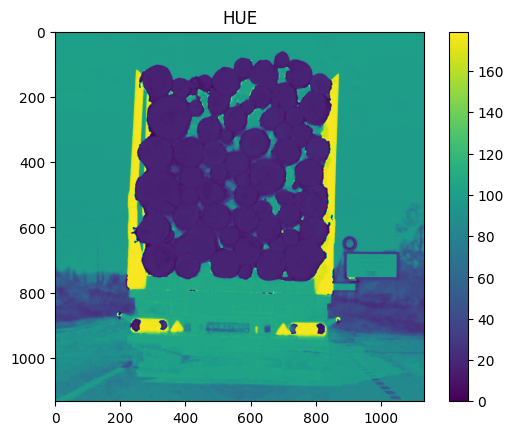

In [345]:
plt.imshow(src_hsv[:,:,0])
plt.colorbar()
plt.title('HUE')

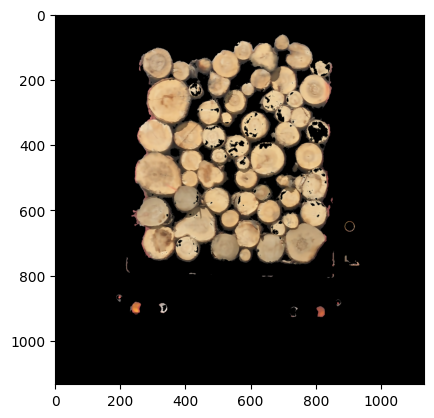

In [346]:
wellplate = np.copy(src)
mask = np.zeros(shape=wellplate.shape[0:2], dtype="bool")
x = np.where(((src_hsv[:,:,0] < 20)))
mask[x] = 1

masked_img = wellplate[:]
masked_img[np.logical_not(mask)] = 0
plt.imshow(masked_img)


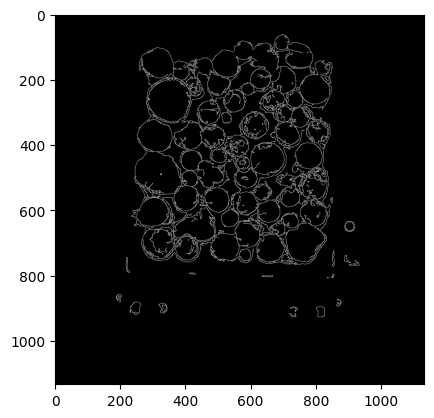

In [348]:
gray = cv.cvtColor(masked_img, cv.COLOR_RGB2GRAY)
edges = cv.Canny(gray, 20, 400, apertureSize = 3)
plt.imshow(edges, 'gray')

In [349]:
detected_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   1,
                   55,
                   param1 = 300,
                   param2 = 20,
                   minRadius = 15, maxRadius = 75)

Total logs:  57


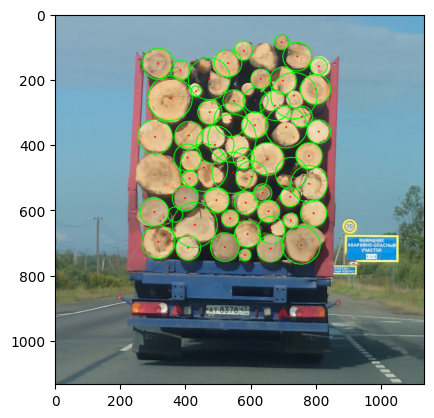

In [350]:
image = src.copy()
pipes_count = 0
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))

    for points in detected_circles[0, :]:
        a, b, r = points[0], points[1], points[2]

        cv.circle(image, (a, b), r, (0, 255, 0), 2)
        cv.circle(image, (a, b), 1, (255, 0, 0), 3)

        pipes_count += 1

print("Total logs: ", pipes_count)
plt.imshow(image)

Опять детектируется не все и не очень точно, но большая часть

logs-3

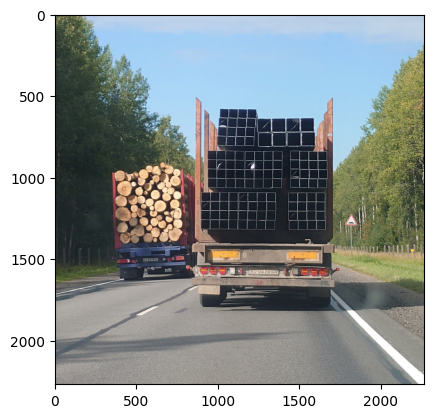

In [351]:
src = cv.imread(r'task2/logs-3.jpg')
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
src = cv.bilateralFilter(src, 9, 75, 75)
plt.imshow(src)

Text(0.5, 1.0, 'Value')

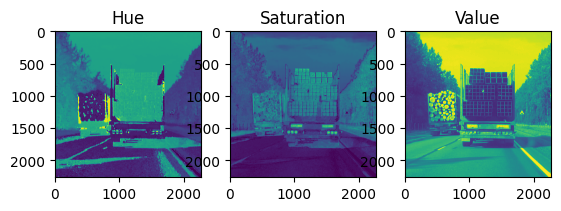

In [352]:
src_hsv = cv.cvtColor(src, cv.COLOR_RGB2HSV)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(src_hsv[:,:,0])
ax1.set_title("Hue")
ax2.imshow(src_hsv[:,:,1])
ax2.set_title("Saturation")
ax3.imshow(src_hsv[:,:,2])
ax3.set_title("Value")

Text(0.5, 1.0, 'HUE')

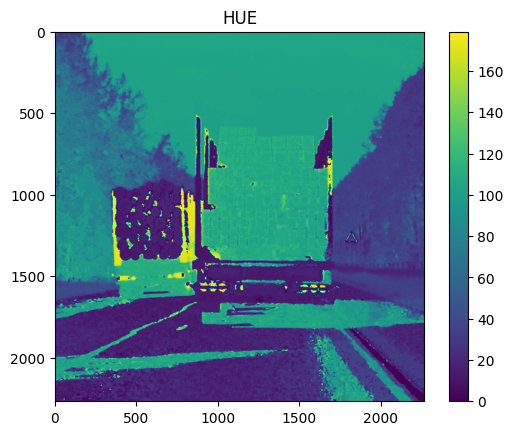

In [353]:
plt.imshow(src_hsv[:,:,0])
plt.colorbar()
plt.title('HUE')

Плохо выделим бревна, если будем использовать только hue.

Text(0.5, 1.0, 'Saturation')

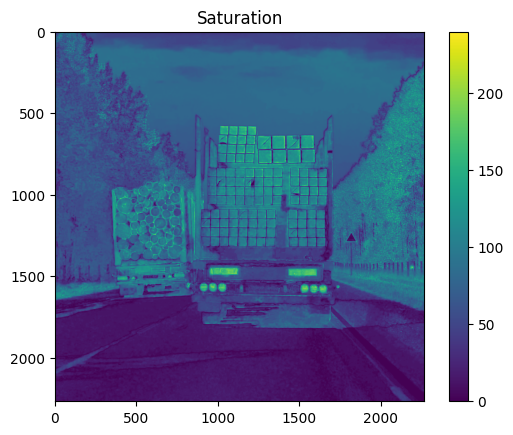

In [354]:
plt.imshow(src_hsv[:,:,1])
plt.colorbar()
plt.title('Saturation')

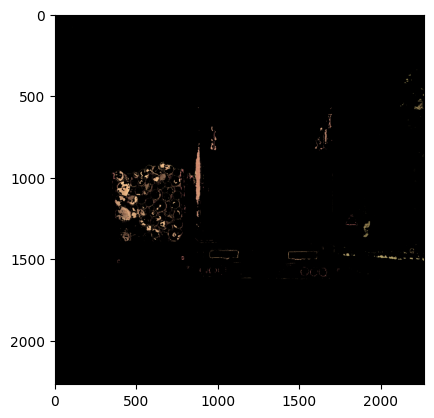

In [355]:
wellplate = np.copy(src)
mask = np.zeros(shape=wellplate.shape[0:2], dtype="bool")
x = np.where(((src_hsv[:,:,0] < 25) & (src_hsv[:,:,1] > 100) & (src_hsv[:,:,1] < 130)))
mask[x] = 1

masked_img = wellplate[:]
masked_img[np.logical_not(mask)] = 0
plt.imshow(masked_img)

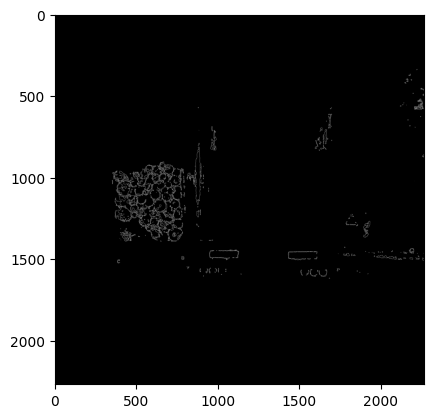

In [356]:
gray = cv.cvtColor(masked_img, cv.COLOR_RGB2GRAY)
edges = cv.Canny(gray, 50, 400, apertureSize = 3)
plt.imshow(edges, 'gray')

In [357]:
detected_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   1,
                   50,
                   param1 = 400,
                   param2 = 20,
                   minRadius = 10, maxRadius = 50)

Total logs:  30


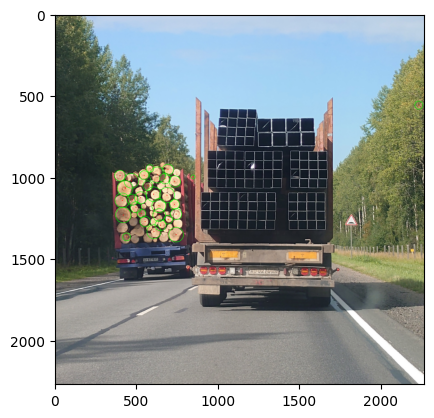

In [358]:
image = src.copy()
pipes_count = 0
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))

    for points in detected_circles[0, :]:
        a, b, r = points[0], points[1], points[2]

        cv.circle(image, (a, b), r, (0, 255, 0), 2)
        cv.circle(image, (a, b), 1, (255, 0, 0), 3)

        pipes_count += 1

print("Total logs: ", pipes_count)
plt.imshow(image)

logs-4

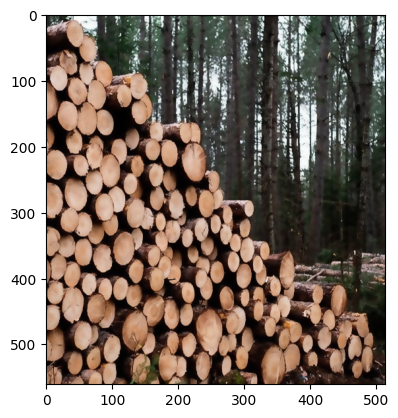

In [359]:
src = cv.imread(r'task2/logs-4.jpg')
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
src = cv.bilateralFilter(src, 9, 75, 75)
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)

plt.imshow(src)

Text(0.5, 1.0, 'Value')

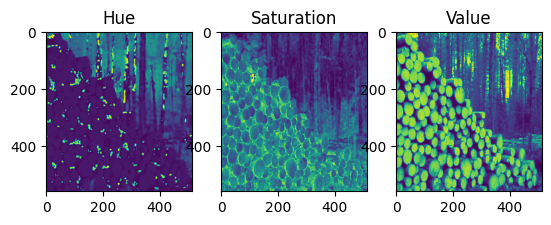

In [360]:
src_hsv = cv.cvtColor(src, cv.COLOR_RGB2HSV)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(src_hsv[:,:,0])
ax1.set_title("Hue")
ax2.imshow(src_hsv[:,:,1])
ax2.set_title("Saturation")
ax3.imshow(src_hsv[:,:,2])
ax3.set_title("Value")

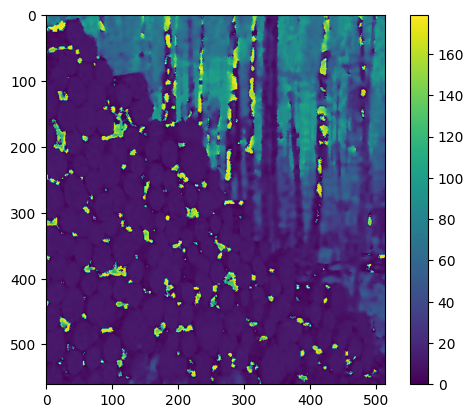

In [361]:
plt.imshow(src_hsv[:,:,0])
plt.colorbar()

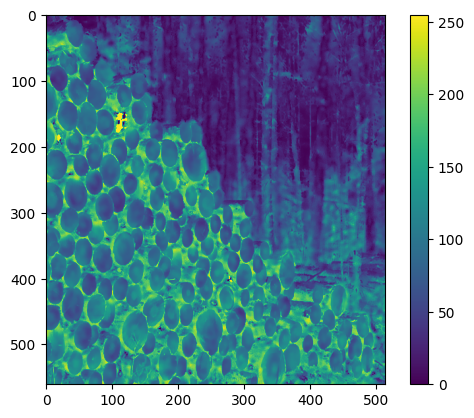

In [362]:
plt.imshow(src_hsv[:,:,1])
plt.colorbar()

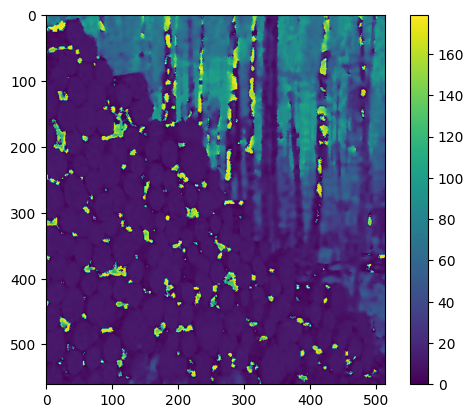

In [363]:
plt.imshow(src_hsv[:,:,0])
plt.colorbar()

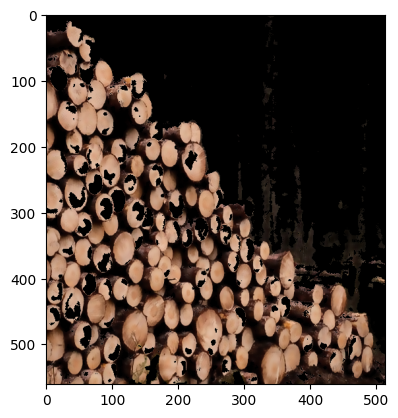

In [364]:
wellplate = np.copy(src)
mask = np.zeros(shape=wellplate.shape[0:2], dtype="bool")
x = np.where(((src_hsv[:,:,1] > 70) & (src_hsv[:,:,0] < 20)))
mask[x] = 1

masked_img = wellplate[:]
masked_img[np.logical_not(mask)] = 0
plt.imshow(masked_img)

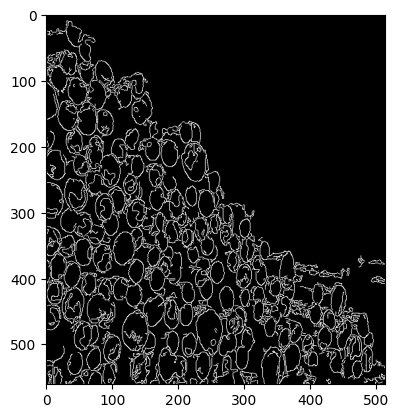

In [365]:
gray = cv.cvtColor(masked_img, cv.COLOR_RGB2GRAY)
edges = cv.Canny(gray, 20, 400, apertureSize = 3)
plt.imshow(edges, 'gray')

In [370]:
detected_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   1,
                   20,
                   param1 = 400,
                   param2 = 20,
                   minRadius = 5, maxRadius = 40)

Total logs:  81


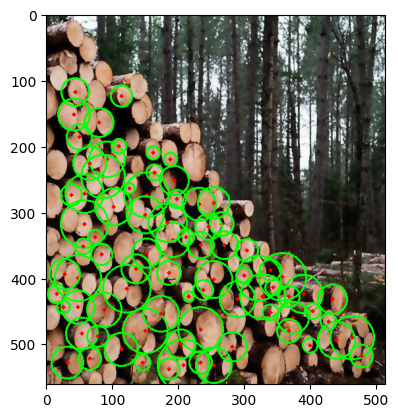

In [371]:
image = src.copy()
pipes_count = 0
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))

    for points in detected_circles[0, :]:
        a, b, r = points[0], points[1], points[2]

        cv.circle(image, (a, b), r, (0, 255, 0), 2)
        cv.circle(image, (a, b), 1, (255, 0, 0), 3)

        pipes_count += 1

print("Total logs: ", pipes_count)
plt.imshow(image)

pipes-4

In [373]:
src = cv.imread(r'task2/pipes-4.jpg')
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
src = cv.bilateralFilter(src, 9, 75, 75)
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)

In [374]:
detected_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   1,
                   10,
                   param1 = 150,
                   param2 = 25,
                   minRadius = 5, maxRadius = 20)

Total pipes:  79


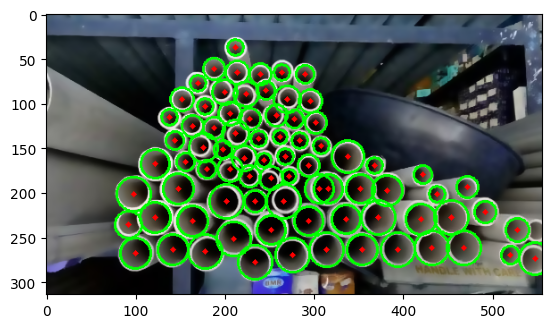

In [375]:
image = src.copy()
pipes_count = 0
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))

    for points in detected_circles[0, :]:
        a, b, r = points[0], points[1], points[2]

        cv.circle(image, (a, b), r, (0, 255, 0), 2)
        cv.circle(image, (a, b), 1, (255, 0, 0), 3)

        pipes_count += 1

print("Total pipes: ", pipes_count)
plt.imshow(image)

pipes-5

In [377]:
src = cv.imread(r'task2/pipes-5.jpg')
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
src = cv.bilateralFilter(src, 9, 75, 75)
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)

Маленькие трубы:

In [418]:
detected_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   1,
                   5,
                   param1 = 200,
                   param2 = 25,
                   minRadius = 3, maxRadius = 30)

Большие трубы:

In [419]:
detected_big_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   1,
                   70,
                   param1 = 150,
                   param2 = 25,
                   minRadius = 70, maxRadius = 80)

Конкатенируем и строим:

In [420]:
detected_circles = np.concat((detected_circles, detected_big_circles), axis=1)

Total pipes:  154


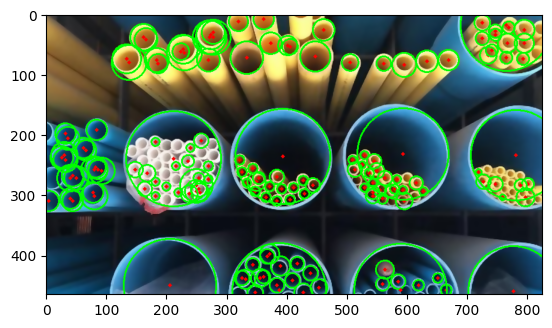

In [421]:
image = src.copy()
pipes_count = 0
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))

    for points in detected_circles[0, :]:
        a, b, r = points[0], points[1], points[2]

        cv.circle(image, (a, b), r, (0, 255, 0), 2)
        cv.circle(image, (a, b), 1, (255, 0, 0), 3)

        pipes_count += 1

print("Total pipes: ", pipes_count)
plt.imshow(image)

Плохо задетектировались только белые трубы

pipes-6

In [422]:
src = cv.imread(r'task2/pipes-6.jpg')
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)

Маленькие трубы:

In [423]:
detected_small_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   1,
                   20,
                   param1 = 300,
                   param2 = 30,
                   minRadius = 5, maxRadius = 30)

Трубы побольше

In [424]:
detected_med_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   1,
                   60,
                   param1 = 400,
                   param2 = 30,
                   minRadius = 30, maxRadius = 50)

Большие трубы

In [425]:
detected_big_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   1,
                   100,
                   param1 = 400,
                   param2 = 30,
                   minRadius = 80, maxRadius = 100)

In [426]:
detected_circles = np.concat((detected_small_circles, detected_med_circles, detected_big_circles), axis=1)

Total pipes:  93


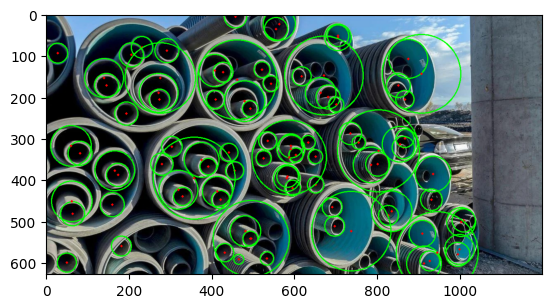

In [427]:
image = src.copy()
pipes_count = 0
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))

    for points in detected_circles[0, :]:
        a, b, r = points[0], points[1], points[2]

        cv.circle(image, (a, b), r, (0, 255, 0), 2)
        cv.circle(image, (a, b), 1, (255, 0, 0), 3)

        pipes_count += 1

print("Total pipes: ", pipes_count)
plt.imshow(image)